In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sys
sys.path.append("../code")

In [2]:
import loaders.cityprotect as cp
import loaders.losaltos as lla
import analysis.populations as pop
from analysis.grouping import time_bin_cityprotect_incident_types

In [3]:
prop_list = ["Breaking & Entering", "Property Crime", "Theft of Vehicle", "Theft from Vehicle", "Theft"]
violent_list = ["Assault", "Robbery", "Sexual Offense", "Homicide", "Rape"]
local_depts = ["Los Altos Police Department",
         "Union City Police"]
sheriff_cities = ["Los Altos Hills",
                  "Saratoga",
                  "Cupertino"] 
depts = local_depts + sheriff_cities
cities = [c.replace("Police", "").replace("Department", "").strip() for c in depts]

In [6]:
cities = [c.replace("Police", "").replace("Department", "").strip() for c in depts]

['Los Altos', 'Union City', 'Los Altos Hills', 'Saratoga', 'Cupertino']

In [4]:
dfs = {dept: cp.cityprotect("../data/raw_data/{}".format(dept.replace(" ", "_")), end_date=datetime(year=2023, month=7, day=1)) for dept in local_depts}
sheriff_df = pd.read_pickle("../data/clean_data/SCCSheriff_2017_2022_inferredCity.pkl")
sheriff_df = cp.reclassify_incidents(sheriff_df)
dfs.update({city:sheriff_df[sheriff_df["inferredCity"]==city] for city in sheriff_cities})
monthly_dfs = {dept:time_bin_cityprotect_incident_types(dfs[dept]) for dept in depts}

Loading from 26 files.
Loading from 26 files.


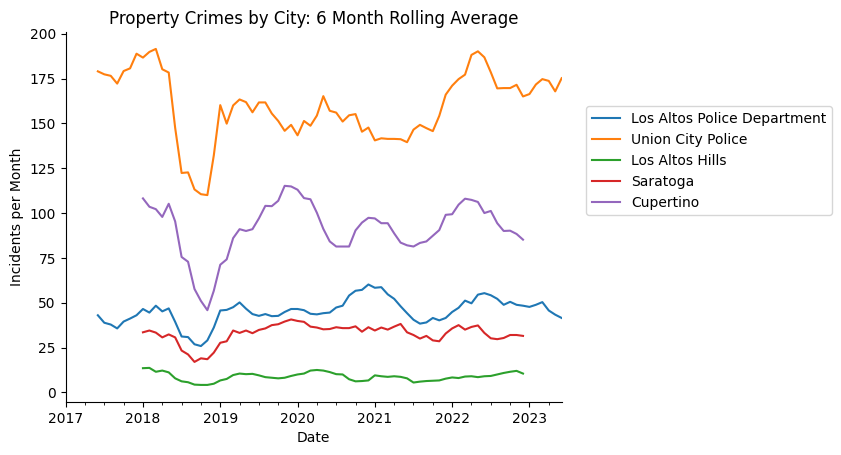

In [10]:
fig, axs = plt.subplots()
for city, monthly_df in monthly_dfs.items():
    monthly_df[monthly_df.columns.intersection(prop_list)].sum(axis=1).rolling(window=6).mean().plot(label=city, ax=axs)
axs.set(xlabel="Date", ylabel="Incidents per Month")
axs.set(title="Property Crimes by City: 6 Month Rolling Average")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

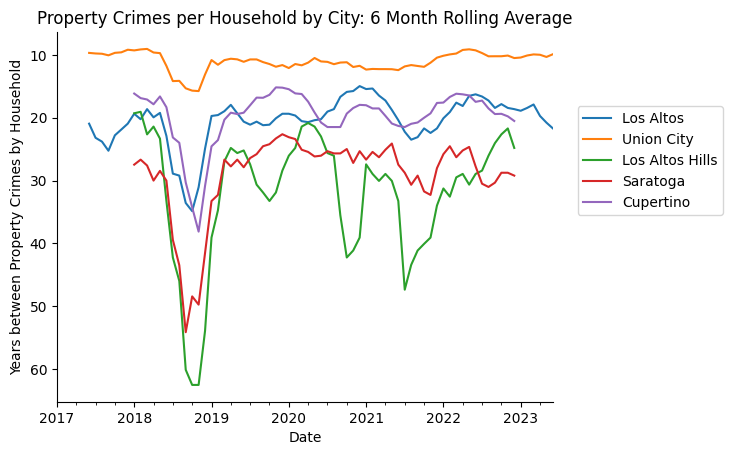

In [12]:
fig, axs = plt.subplots()
for dept, monthly_df in monthly_dfs.items():
    city = dept.replace("Police", "").replace("Department", "").strip()
    monthly_df[monthly_df.columns.intersection(prop_list)].sum(axis=1).rolling(window=6).mean().div(pop.get_households(city)).apply(lambda x: 1/(12*x)).plot(label=city, ax=axs).invert_yaxis()
axs.set(xlabel="Date", ylabel="Years between Property Crimes by Household")
axs.set(title="Property Crimes per Household by City: 6 Month Rolling Average")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()